PLOTTING NOISE AND SAVITZKY - GOLAY FILTER

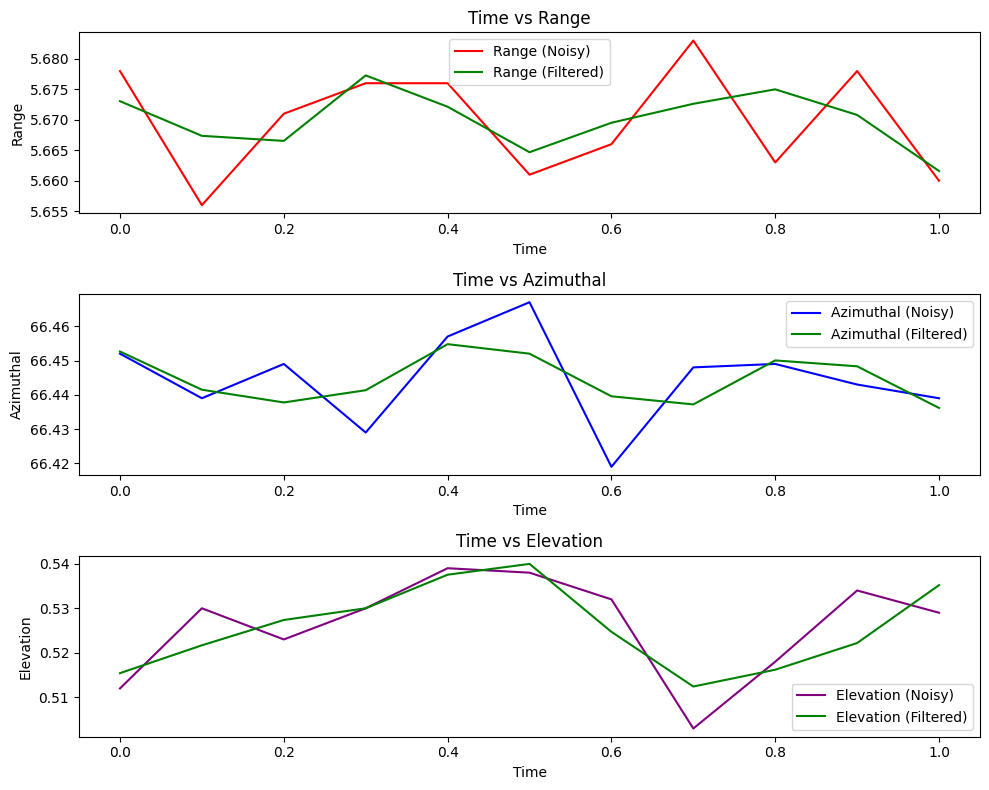

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Load data from Excel file
# Make sure your Excel file is named 'data.xlsx' and has the correct sheet name
file_path = '/content/Isro_work1.xlsx'  # Update the path if necessary
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Replace 'Sheet1' with your actual sheet name if different

# Apply Savitzky-Golay filter to smooth data
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Plot Time vs Range (Noisy and Filtered)
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Range_filtered'], label='Range (Filtered)', color='green')
plt.title("Time vs Range")
plt.xlabel("Time")
plt.ylabel("Range")
plt.legend()

# Plot Time vs Azimuthal (Noisy and Filtered)
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='blue')
plt.plot(df['Time'], df['Azimuthal_filtered'], label='Azimuthal (Filtered)', color='green')
plt.title("Time vs Azimuthal")
plt.xlabel("Time")
plt.ylabel("Azimuthal")
plt.legend()

# Plot Time vs Elevation (Noisy and Filtered)
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='purple')
plt.plot(df['Time'], df['Elevation_filtered'], label='Elevation (Filtered)', color='green')
plt.title("Time vs Elevation")
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.legend()

plt.tight_layout()
plt.show()


FOR SUCCESSIVE DIFFERENCE

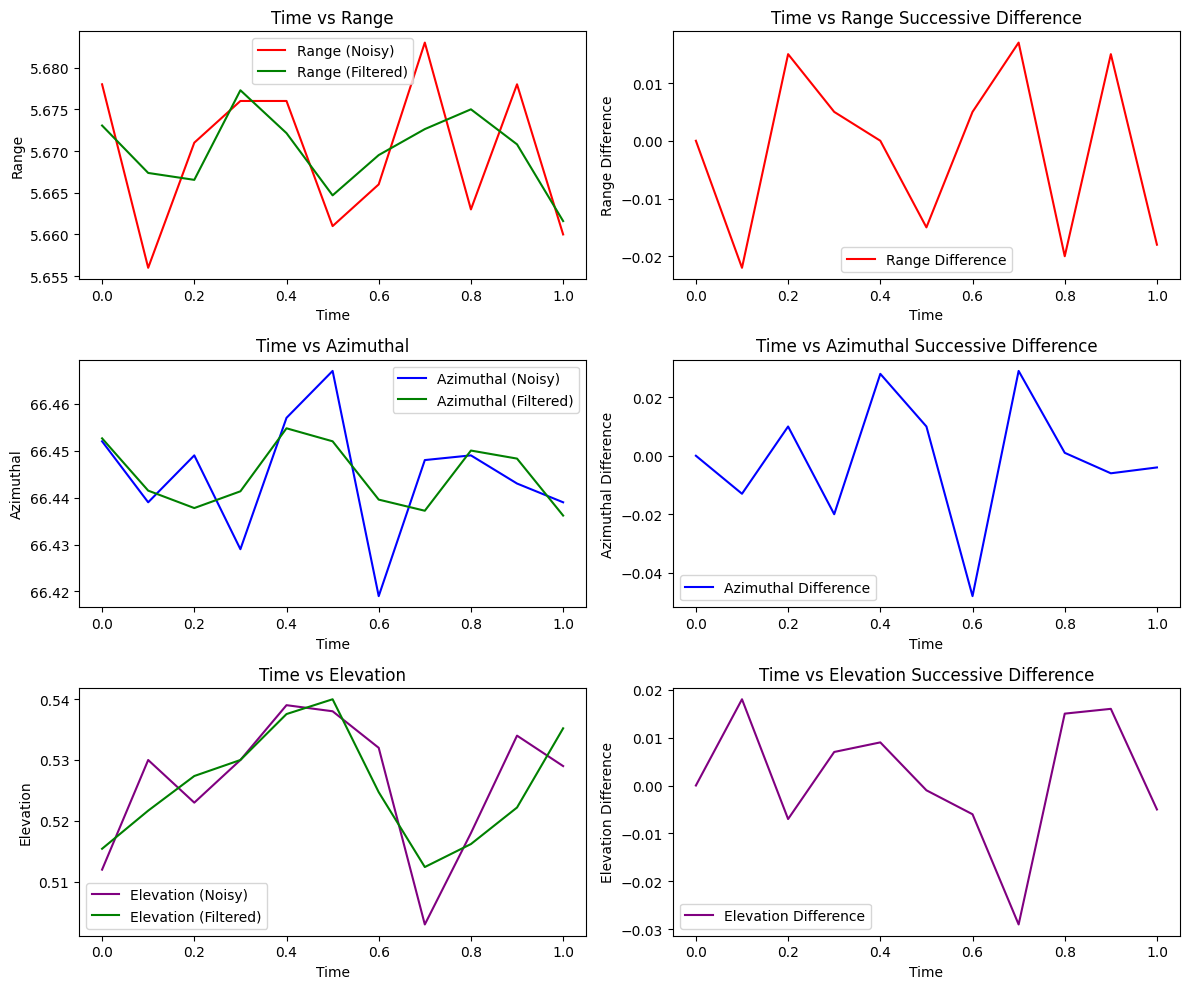

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update the path if necessary
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Ensure correct sheet name

# Calculate successive differences
df['Range_diff'] = df['Range'].diff().fillna(0)
df['Azimuthal_diff'] = df['Azimuthal'].diff().fillna(0)
df['Elevation_diff'] = df['Elevation'].diff().fillna(0)

# Apply Savitzky-Golay filter to smooth data (can adjust based on noise levels)
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Plot Time vs Range (Noisy, Filtered, and Successive Differences)
plt.figure(figsize=(12, 10))

# Time vs Range
plt.subplot(3, 2, 1)
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Range_filtered'], label='Range (Filtered)', color='green')
plt.title("Time vs Range")
plt.xlabel("Time")
plt.ylabel("Range")
plt.legend()

# Time vs Range Difference
plt.subplot(3, 2, 2)
plt.plot(df['Time'], df['Range_diff'], label='Range Difference', color='red')
plt.title("Time vs Range Successive Difference")
plt.xlabel("Time")
plt.ylabel("Range Difference")
plt.legend()

# Time vs Azimuthal
plt.subplot(3, 2, 3)
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='blue')
plt.plot(df['Time'], df['Azimuthal_filtered'], label='Azimuthal (Filtered)', color='green')
plt.title("Time vs Azimuthal")
plt.xlabel("Time")
plt.ylabel("Azimuthal")
plt.legend()

# Time vs Azimuthal Difference
plt.subplot(3, 2, 4)
plt.plot(df['Time'], df['Azimuthal_diff'], label='Azimuthal Difference', color='blue')
plt.title("Time vs Azimuthal Successive Difference")
plt.xlabel("Time")
plt.ylabel("Azimuthal Difference")
plt.legend()

# Time vs Elevation
plt.subplot(3, 2, 5)
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='purple')
plt.plot(df['Time'], df['Elevation_filtered'], label='Elevation (Filtered)', color='green')
plt.title("Time vs Elevation")
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.legend()

# Time vs Elevation Difference
plt.subplot(3, 2, 6)
plt.plot(df['Time'], df['Elevation_diff'], label='Elevation Difference', color='purple')
plt.title("Time vs Elevation Successive Difference")
plt.xlabel("Time")
plt.ylabel("Elevation Difference")
plt.legend()

plt.tight_layout()
plt.show()


SVAGOL_FILTER NOISE BANDWIDTH

In [15]:
import pandas as pd
from scipy.signal import savgol_filter
import numpy as np

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Apply Savitzky-Golay filter to smooth the data (window_length and polyorder can be adjusted)
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Calculate the noise (difference between original and filtered data)
df['Range_noise'] = df['Range'] - df['Range_filtered']
df['Azimuthal_noise'] = df['Azimuthal'] - df['Azimuthal_filtered']
df['Elevation_noise'] = df['Elevation'] - df['Elevation_filtered']

# Calculate noise power (sum of squared noise differences)
range_noise_power = np.sum(df['Range_noise']**2)
azimuthal_noise_power = np.sum(df['Azimuthal_noise']**2)
elevation_noise_power = np.sum(df['Elevation_noise']**2)

# Calculate the variance of noise as a measure of noise bandwidth
range_noise_variance = np.var(df['Range_noise'])
azimuthal_noise_variance = np.var(df['Azimuthal_noise'])
elevation_noise_variance = np.var(df['Elevation_noise'])

# Display noise power and noise bandwidth (variance)
print(f"Range Noise Power: {range_noise_power}")
print(f"Azimuthal Noise Power: {azimuthal_noise_power}")
print(f"Elevation Noise Power: {elevation_noise_power}\n")

print(f"Range Noise Bandwidth (Variance): {range_noise_variance}")
print(f"Azimuthal Noise Bandwidth (Variance): {azimuthal_noise_variance}")
print(f"Elevation Noise Bandwidth (Variance): {elevation_noise_variance}\n")

# Save the filtered data to a new CSV file
output_file_path = 'filtered_data.csv'  # This will save the file in the current working directory
df_filtered = df[['Time', 'Range_filtered', 'Azimuthal_filtered', 'Elevation_filtered']]
df_filtered.columns = ['Time', 'Range', 'Azimuthal', 'Elevation']  # Rename columns to original names
df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")


Range Noise Power: 0.0005220391836734205
Azimuthal Noise Power: 0.0010920914285716856
Elevation Noise Power: 0.0004289012244897979

Range Noise Bandwidth (Variance): 4.740100522853459e-05
Azimuthal Noise Bandwidth (Variance): 9.92803643110394e-05
Elevation Noise Bandwidth (Variance): 3.876261089559786e-05

Filtered data saved to filtered_data.csv


Range Noise Bandwidth (Variance): 4.740100522853459e-05
Azimuthal Noise Bandwidth (Variance): 9.92803643110394e-05
Elevation Noise Bandwidth (Variance): 3.876261089559786e-05



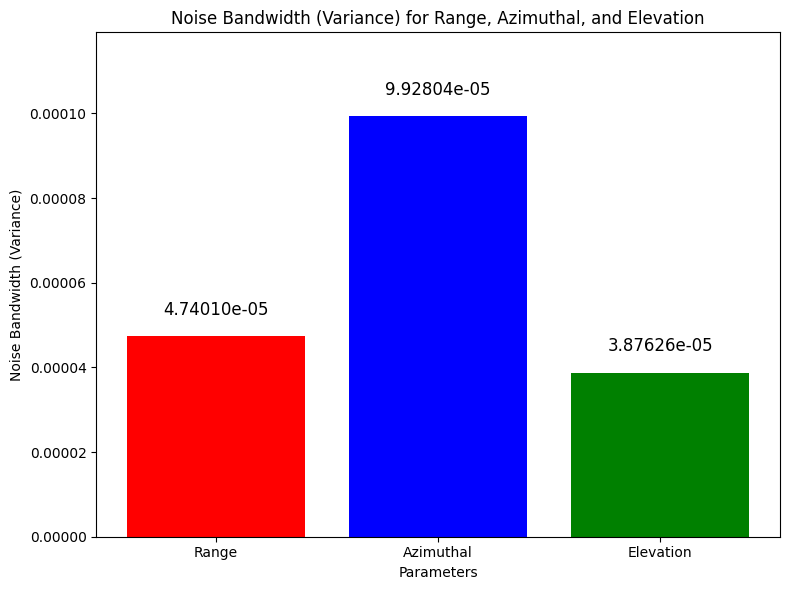

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Apply Savitzky-Golay filter to smooth the data (window_length and polyorder can be adjusted)
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Calculate the noise (difference between original and filtered data)
df['Range_noise'] = df['Range'] - df['Range_filtered']
df['Azimuthal_noise'] = df['Azimuthal'] - df['Azimuthal_filtered']
df['Elevation_noise'] = df['Elevation'] - df['Elevation_filtered']

# Calculate the variance of noise as a measure of noise bandwidth
range_noise_variance = np.var(df['Range_noise'])
azimuthal_noise_variance = np.var(df['Azimuthal_noise'])
elevation_noise_variance = np.var(df['Elevation_noise'])

# Print noise bandwidth (variance)
print(f"Range Noise Bandwidth (Variance): {range_noise_variance}")
print(f"Azimuthal Noise Bandwidth (Variance): {azimuthal_noise_variance}")
print(f"Elevation Noise Bandwidth (Variance): {elevation_noise_variance}\n")

# Plot the noise bandwidth (variance) as a bar chart
bandwidths = [range_noise_variance, azimuthal_noise_variance, elevation_noise_variance]
labels = ['Range', 'Azimuthal', 'Elevation']

plt.figure(figsize=(8, 6))
plt.bar(labels, bandwidths, color=['red', 'blue', 'green'])
plt.title('Noise Bandwidth (Variance) for Range, Azimuthal, and Elevation')
plt.xlabel('Parameters')
plt.ylabel('Noise Bandwidth (Variance)')
plt.ylim(0, max(bandwidths) * 1.2)  # Set y-limit for better visibility
for i, v in enumerate(bandwidths):
    plt.text(i, v + 0.000005, f"{v:.5e}", ha='center', fontsize=12)  # Display values on top of bars

plt.tight_layout()
plt.show()


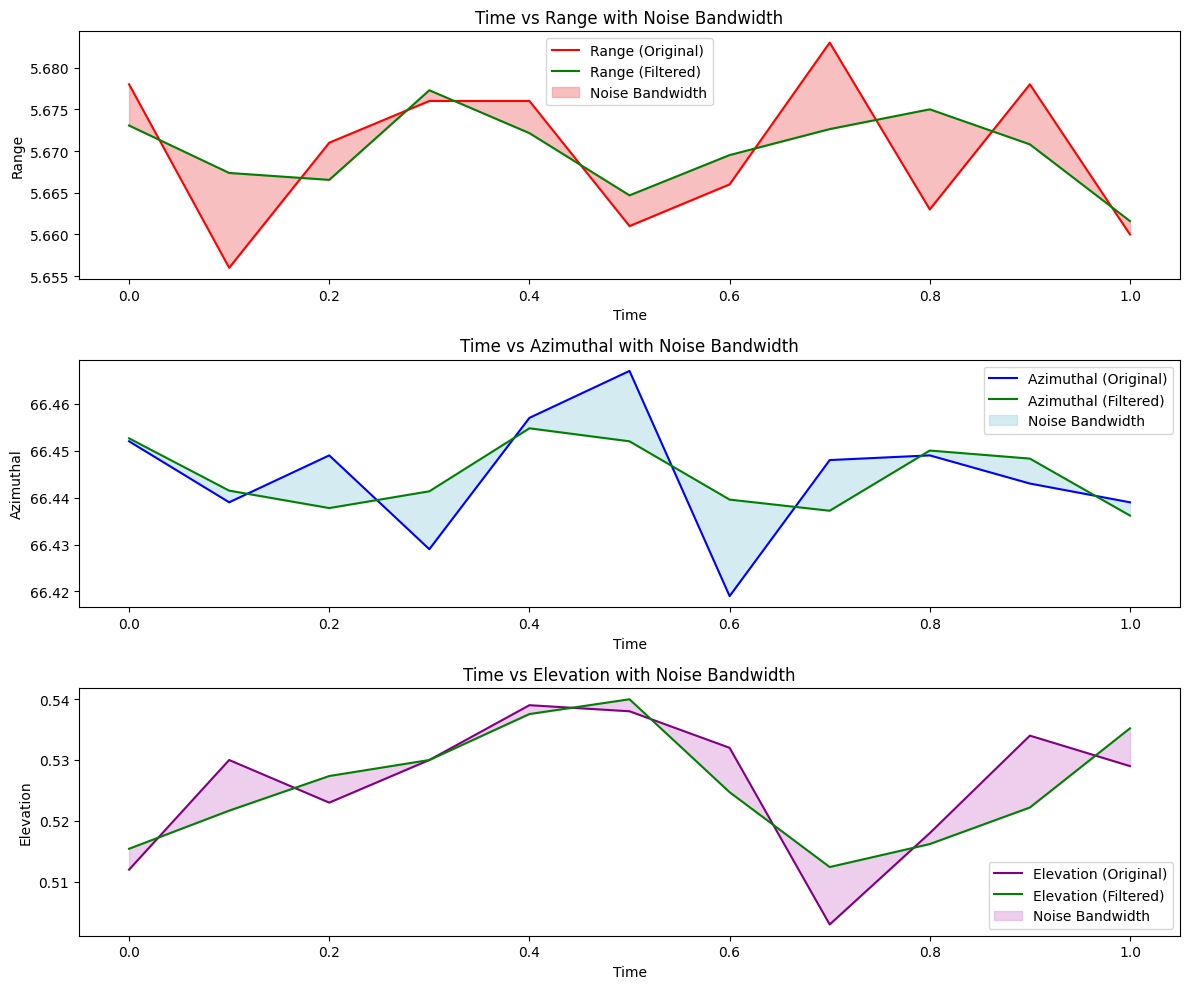

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Apply Savitzky-Golay filter to smooth the data (window_length and polyorder can be adjusted)
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Calculate the noise (difference between original and filtered data)
df['Range_noise'] = df['Range'] - df['Range_filtered']
df['Azimuthal_noise'] = df['Azimuthal'] - df['Azimuthal_filtered']
df['Elevation_noise'] = df['Elevation'] - df['Elevation_filtered']

# Plotting Range, Azimuthal, and Elevation with Noise Bandwidth
plt.figure(figsize=(12, 10))

# Plot Range with noise bandwidth highlighted
plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Range'], label='Range (Original)', color='red')
plt.plot(df['Time'], df['Range_filtered'], label='Range (Filtered)', color='green')
plt.fill_between(df['Time'], df['Range_filtered'], df['Range'], color='lightcoral', alpha=0.5, label='Noise Bandwidth')
plt.title('Time vs Range with Noise Bandwidth')
plt.xlabel('Time')
plt.ylabel('Range')
plt.legend()

# Plot Azimuthal with noise bandwidth highlighted
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Original)', color='blue')
plt.plot(df['Time'], df['Azimuthal_filtered'], label='Azimuthal (Filtered)', color='green')
plt.fill_between(df['Time'], df['Azimuthal_filtered'], df['Azimuthal'], color='lightblue', alpha=0.5, label='Noise Bandwidth')
plt.title('Time vs Azimuthal with Noise Bandwidth')
plt.xlabel('Time')
plt.ylabel('Azimuthal')
plt.legend()

# Plot Elevation with noise bandwidth highlighted
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Elevation'], label='Elevation (Original)', color='purple')
plt.plot(df['Time'], df['Elevation_filtered'], label='Elevation (Filtered)', color='green')
plt.fill_between(df['Time'], df['Elevation_filtered'], df['Elevation'], color='plum', alpha=0.5, label='Noise Bandwidth')
plt.title('Time vs Elevation with Noise Bandwidth')
plt.xlabel('Time')
plt.ylabel('Elevation')
plt.legend()

plt.tight_layout()
plt.show()


SAVING WITHOUT NOISE DATA

In [18]:
import pandas as pd
from scipy.signal import savgol_filter

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Apply Savitzky-Golay filter to smooth the data (window_length and polyorder can be adjusted)
df['Range_filtered'] = savgol_filter(df['Range'], 5, 2)
df['Azimuthal_filtered'] = savgol_filter(df['Azimuthal'], 5, 2)
df['Elevation_filtered'] = savgol_filter(df['Elevation'], 5, 2)

# Create a new DataFrame with filtered data
df_filtered = df[['Time', 'Range_filtered', 'Azimuthal_filtered', 'Elevation_filtered']]
df_filtered.columns = ['Time', 'Range', 'Azimuthal', 'Elevation']  # Rename columns to original names

# Save the filtered data to a new CSV file
output_file_path = 'Savgol_filter_data.csv'  # This will save the file in the current working directory
df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")


Filtered data saved to Savgol_filter_data.csv
Filtered data saved to Savgol_filter_data.csv


GAUSSIAN FILTER

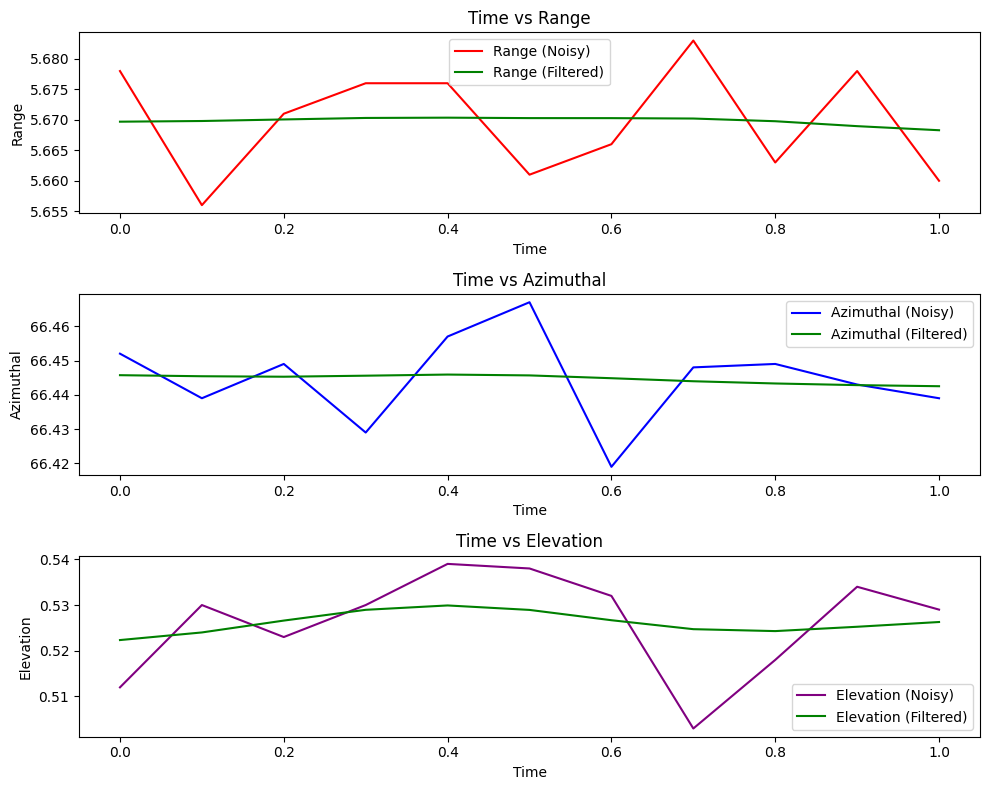

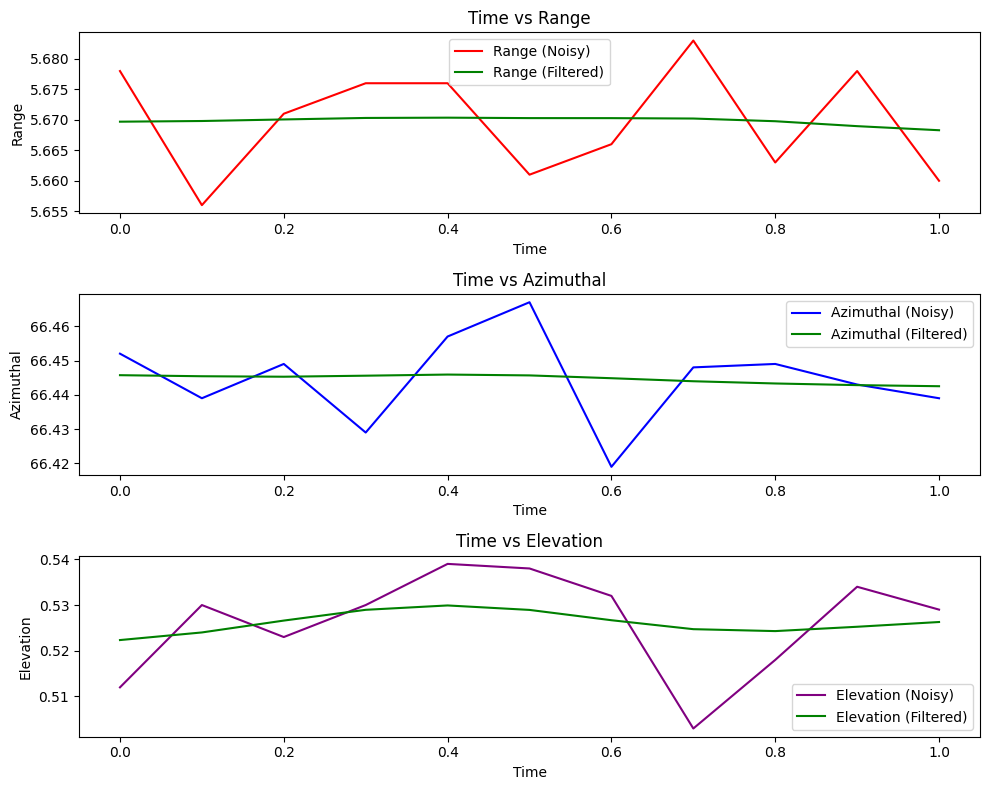

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Load data from Excel file
# Make sure your Excel file is named 'data.xlsx' and has the correct sheet name
file_path = '/content/Isro_work1.xlsx'  # Update the path if necessary
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Replace 'Sheet1' with your actual sheet name if different

# Apply Gaussian filter to smooth data
sigma_value = 2  # You can adjust the sigma value for different levels of smoothing
df['Range_filtered'] = gaussian_filter1d(df['Range'], sigma=sigma_value)
df['Azimuthal_filtered'] = gaussian_filter1d(df['Azimuthal'], sigma=sigma_value)
df['Elevation_filtered'] = gaussian_filter1d(df['Elevation'], sigma=sigma_value)

# Plot Time vs Range (Noisy and Filtered)
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Range_filtered'], label='Range (Filtered)', color='green')
plt.title("Time vs Range")
plt.xlabel("Time")
plt.ylabel("Range")
plt.legend()

# Plot Time vs Azimuthal (Noisy and Filtered)
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='blue')
plt.plot(df['Time'], df['Azimuthal_filtered'], label='Azimuthal (Filtered)', color='green')
plt.title("Time vs Azimuthal")
plt.xlabel("Time")
plt.ylabel("Azimuthal")
plt.legend()

# Plot Time vs Elevation (Noisy and Filtered)
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='purple')
plt.plot(df['Time'], df['Elevation_filtered'], label='Elevation (Filtered)', color='green')
plt.title("Time vs Elevation")
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.legend()

plt.tight_layout()
plt.show()


Index(['Time', 'Range', 'Azimuthal', 'Elevation'], dtype='object')


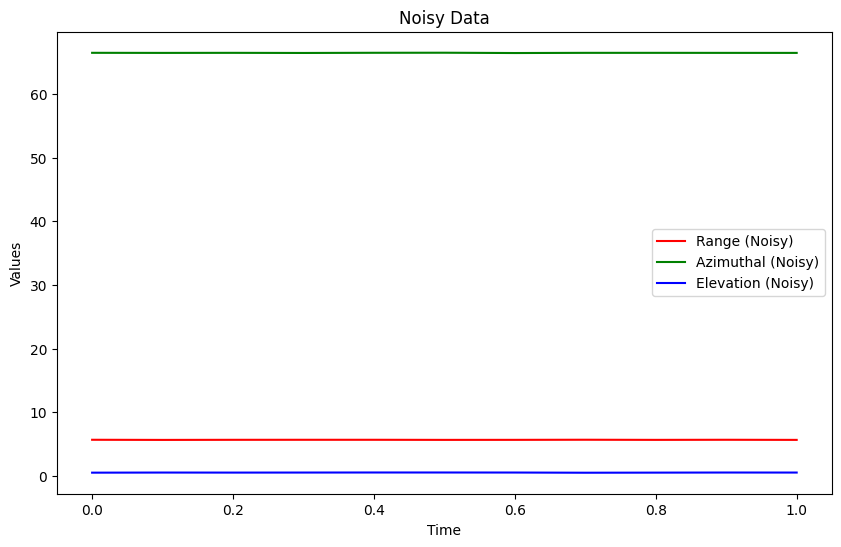

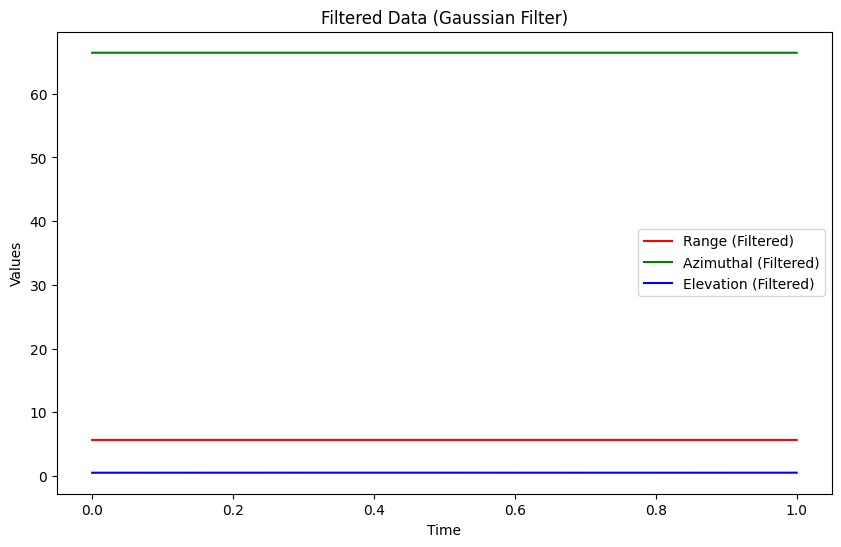

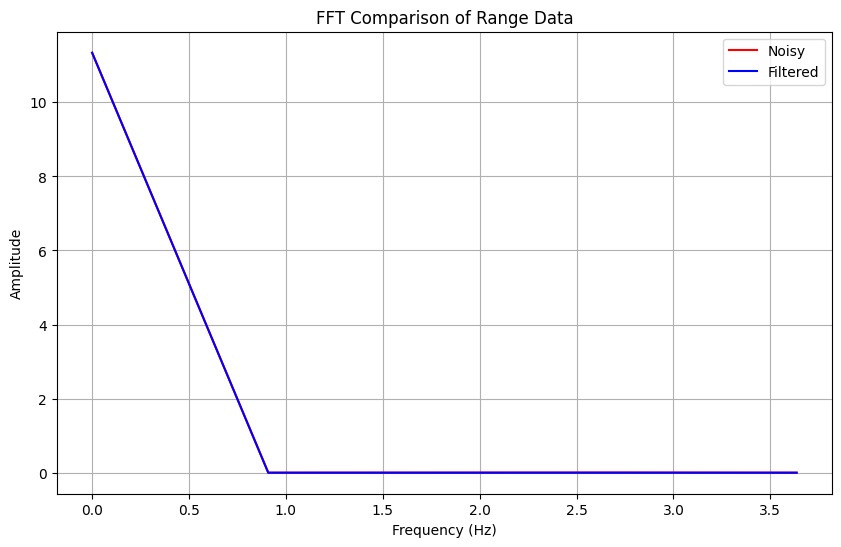

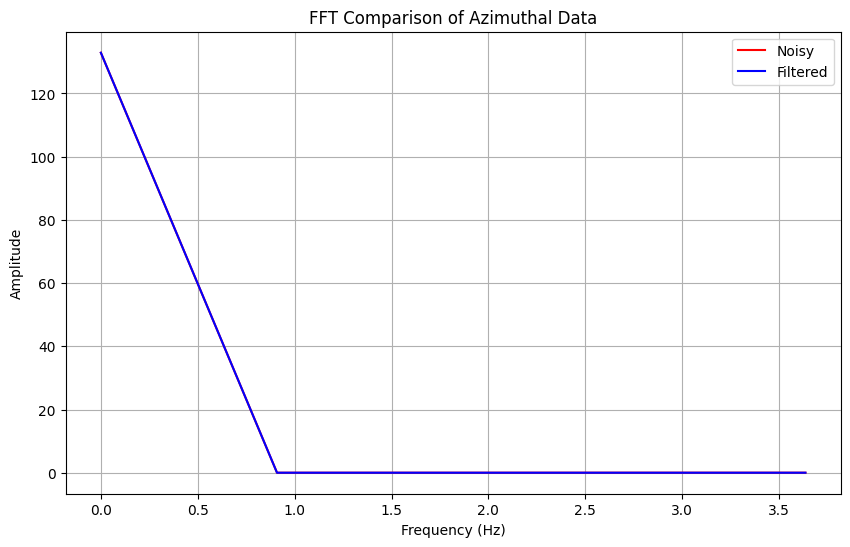

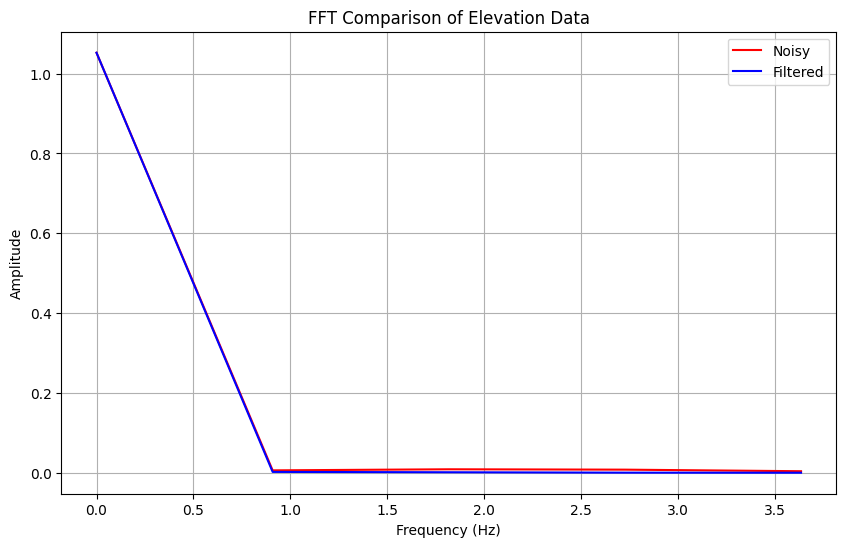

Index(['Time', 'Range', 'Azimuthal', 'Elevation'], dtype='object')


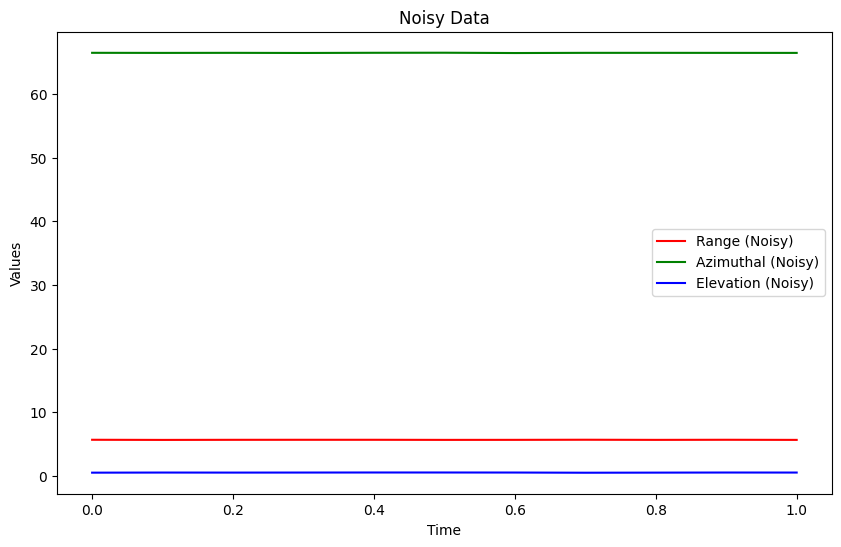

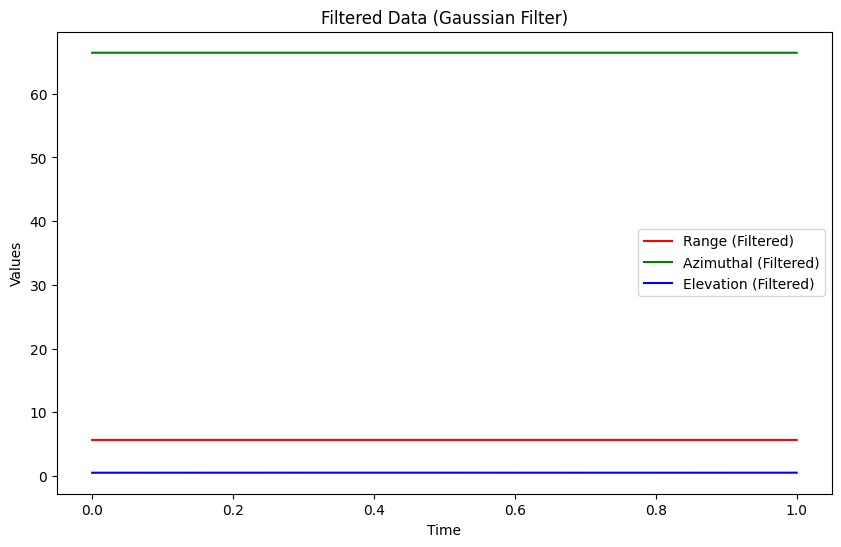

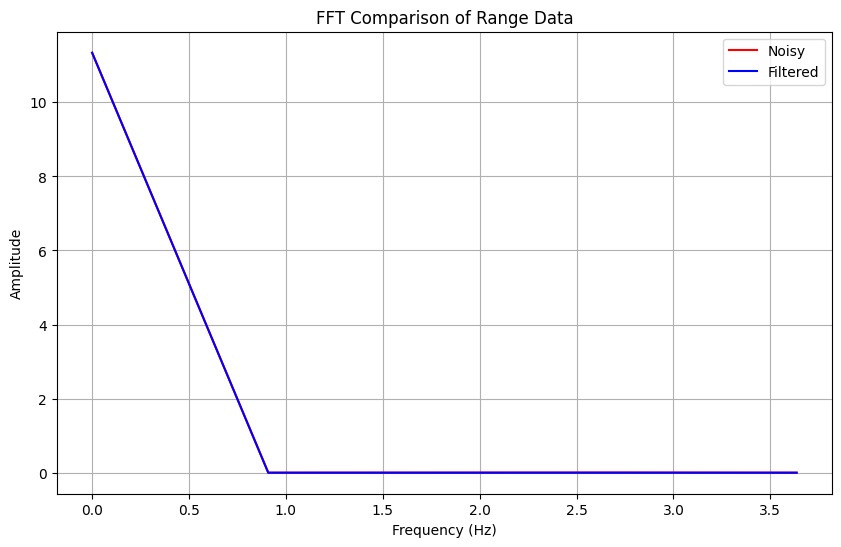

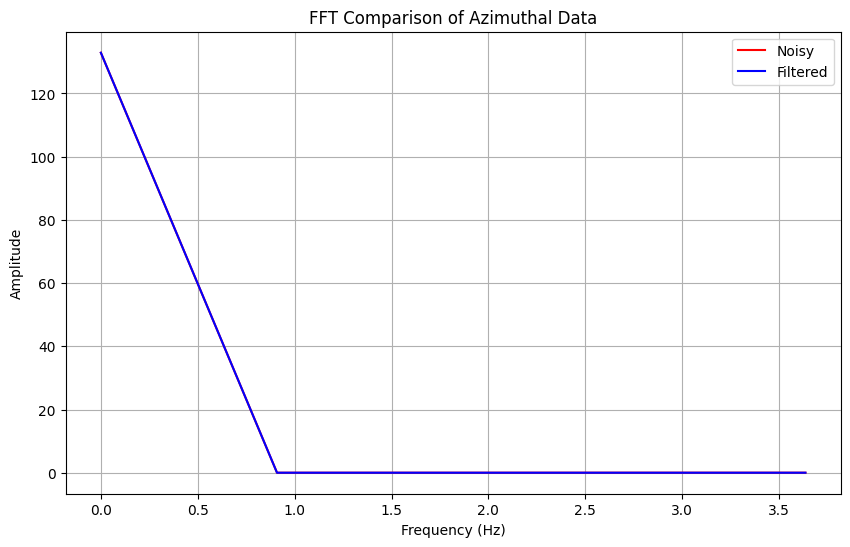

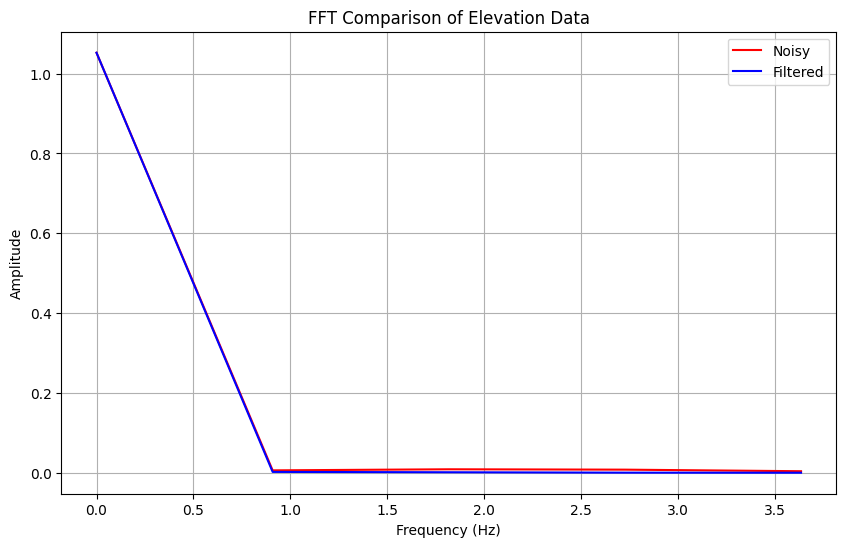

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fft import fft, fftfreq

# Load Excel data (ensure the file path is correct)
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Check the column names to ensure correct access
print(df.columns)  # Print the column names to verify them

# Remove any leading/trailing spaces from column names, if present
df.columns = df.columns.str.strip()

# Plot the noisy data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='green')
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='blue')
plt.title('Noisy Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Apply a Gaussian filter to reduce noise
def gaussian_filter_data(data, sigma):
    return gaussian_filter(data, sigma=sigma)

# Parameters for the filter
sigma = 2  # Standard deviation for Gaussian kernel

# Apply Gaussian filter to the data
filtered_range = gaussian_filter_data(df['Range'], sigma)
filtered_azimuthal = gaussian_filter_data(df['Azimuthal'], sigma)
filtered_elevation = gaussian_filter_data(df['Elevation'], sigma)

# Plot filtered data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], filtered_range, label='Range (Filtered)', color='red')
plt.plot(df['Time'], filtered_azimuthal, label='Azimuthal (Filtered)', color='green')
plt.plot(df['Time'], filtered_elevation, label='Elevation (Filtered)', color='blue')
plt.title('Filtered Data (Gaussian Filter)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Function to plot FFT for noisy and filtered data together
def plot_fft_comparison(noisy_data, filtered_data, title, color_noisy='red', color_filtered='blue'):
    n = len(noisy_data)  # Length of the data
    T = 0.1  # Sample spacing (time interval)

    # FFT for noisy data
    noisy_data = np.asarray(noisy_data, dtype=np.float64)
    yf_noisy = fft(noisy_data)
    xf = fftfreq(n, T)[:n // 2]

    # FFT for filtered data
    filtered_data = np.asarray(filtered_data, dtype=np.float64)
    yf_filtered = fft(filtered_data)

    # Plotting FFT for noisy and filtered data in the same plot
    plt.figure(figsize=(10, 6))
    plt.plot(xf, 2.0 / n * np.abs(yf_noisy[:n // 2]), label='Noisy', color=color_noisy)
    plt.plot(xf, 2.0 / n * np.abs(yf_filtered[:n // 2]), label='Filtered', color=color_filtered)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

# Plot FFT comparison for each data type
plot_fft_comparison(df['Range'], filtered_range, 'FFT Comparison of Range Data')
plot_fft_comparison(df['Azimuthal'], filtered_azimuthal, 'FFT Comparison of Azimuthal Data')
plot_fft_comparison(df['Elevation'], filtered_elevation, 'FFT Comparison of Elevation Data')


SAVING GAUSSIAN FILTER DATA WITHOUT NOISE

In [21]:
# Prepare the filtered data for saving to an Excel file
filtered_df = pd.DataFrame({
    'Time': df['Time'],
    'Range (Filtered)': filtered_range,
    'Azimuthal (Filtered)': filtered_azimuthal,
    'Elevation (Filtered)': filtered_elevation
})

# Save the filtered data to an Excel file
file_output_path = 'filtered_gaussian_data.xlsx'
filtered_df.to_excel(file_output_path, index=False)

print(f'Filtered data saved to {file_output_path}')


Filtered data saved to filtered_gaussian_data.xlsx
Filtered data saved to filtered_gaussian_data.xlsx


MOVING AVERAGE FILTER (LINEAR FILTER)

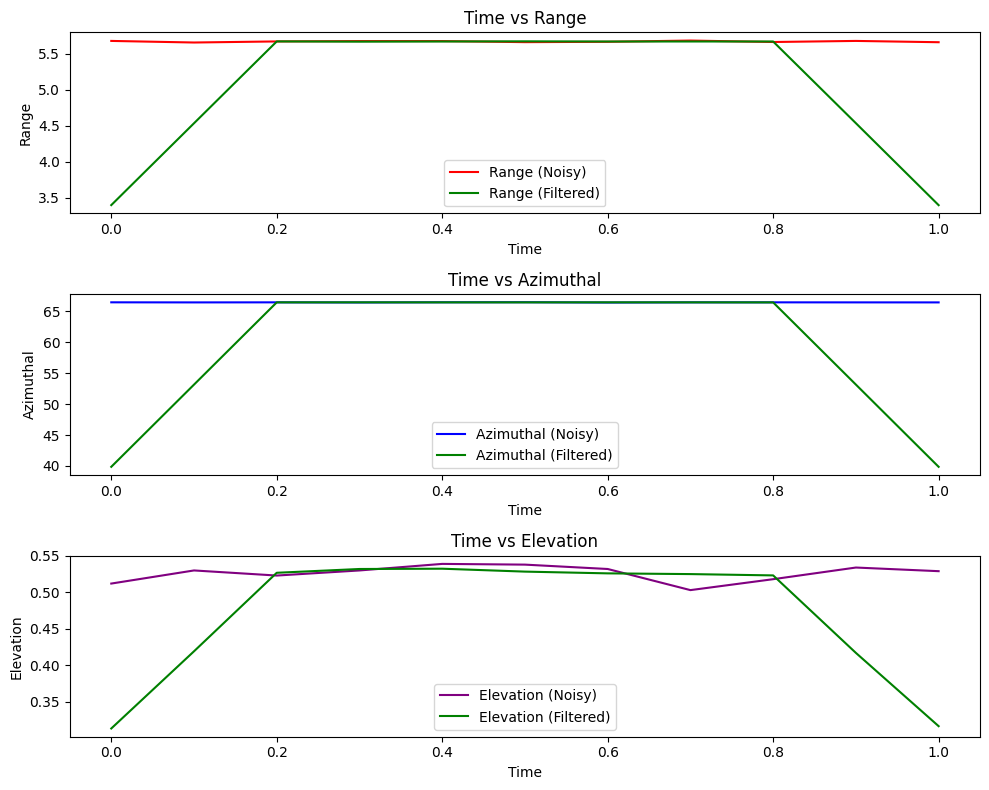

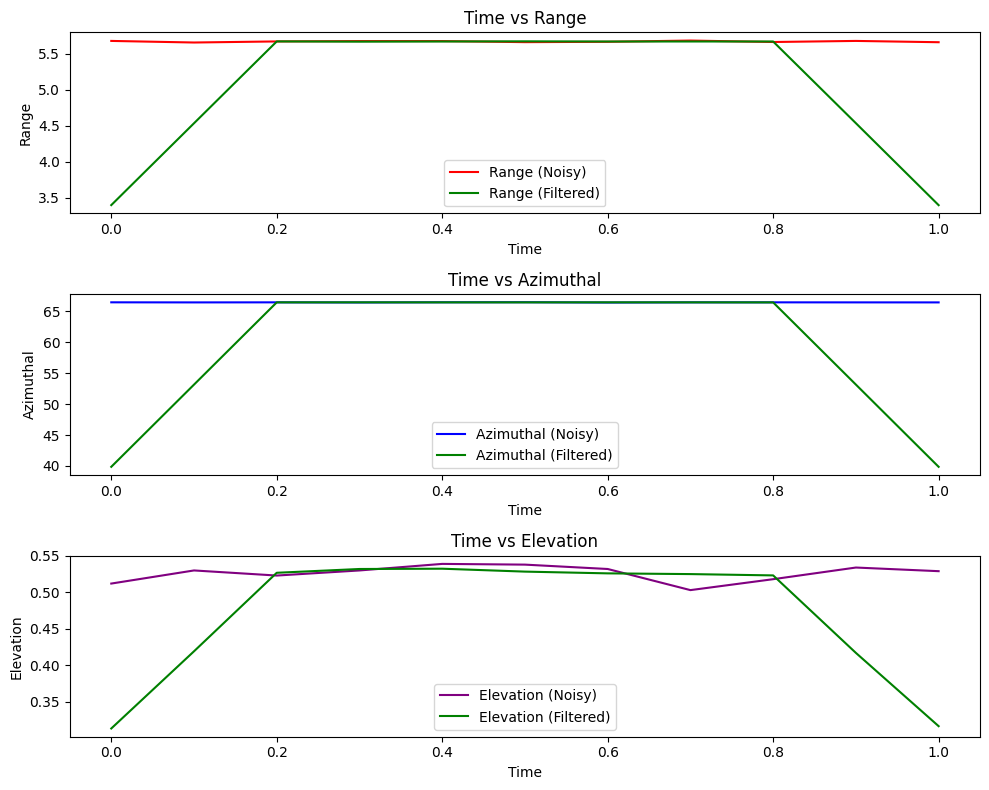

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from Excel file
file_path = '/content/Isro_work1.xlsx'  # Update the path if necessary
df = pd.read_excel(file_path, sheet_name='Sheet1')  # Replace 'Sheet1' with your actual sheet name if different

# Define a function for the moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Set window size for the moving average filter
window_size = 5  # You can adjust the window size for different levels of smoothing

# Apply the moving average filter to smooth data
df['Range_filtered'] = moving_average(df['Range'], window_size)
df['Azimuthal_filtered'] = moving_average(df['Azimuthal'], window_size)
df['Elevation_filtered'] = moving_average(df['Elevation'], window_size)

# Plot Time vs Range (Noisy and Filtered)
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Range_filtered'], label='Range (Filtered)', color='green')
plt.title("Time vs Range")
plt.xlabel("Time")
plt.ylabel("Range")
plt.legend()

# Plot Time vs Azimuthal (Noisy and Filtered)
plt.subplot(3, 1, 2)
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='blue')
plt.plot(df['Time'], df['Azimuthal_filtered'], label='Azimuthal (Filtered)', color='green')
plt.title("Time vs Azimuthal")
plt.xlabel("Time")
plt.ylabel("Azimuthal")
plt.legend()

# Plot Time vs Elevation (Noisy and Filtered)
plt.subplot(3, 1, 3)
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='purple')
plt.plot(df['Time'], df['Elevation_filtered'], label='Elevation (Filtered)', color='green')
plt.title("Time vs Elevation")
plt.xlabel("Time")
plt.ylabel("Elevation")
plt.legend()

plt.tight_layout()
plt.show()


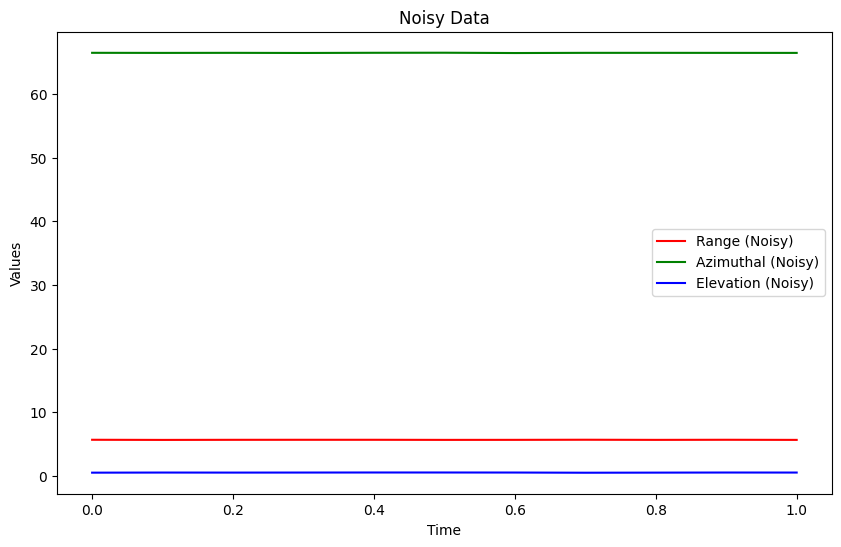

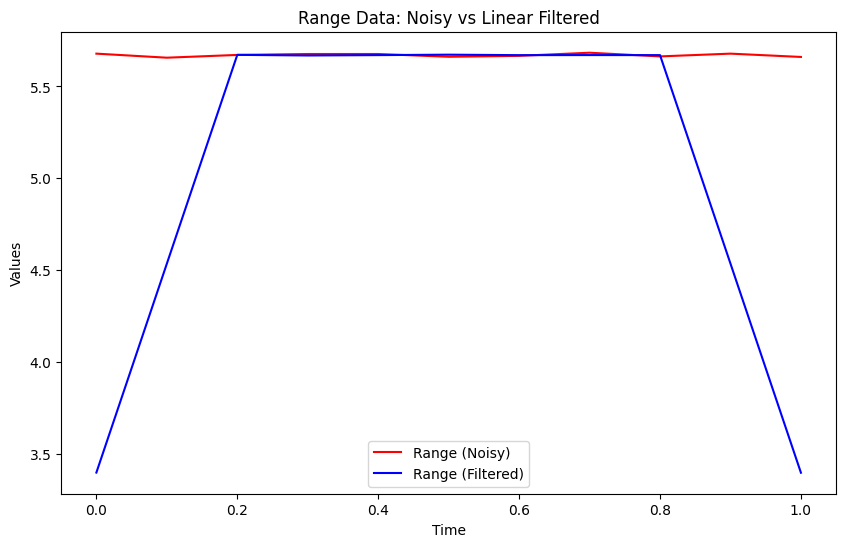

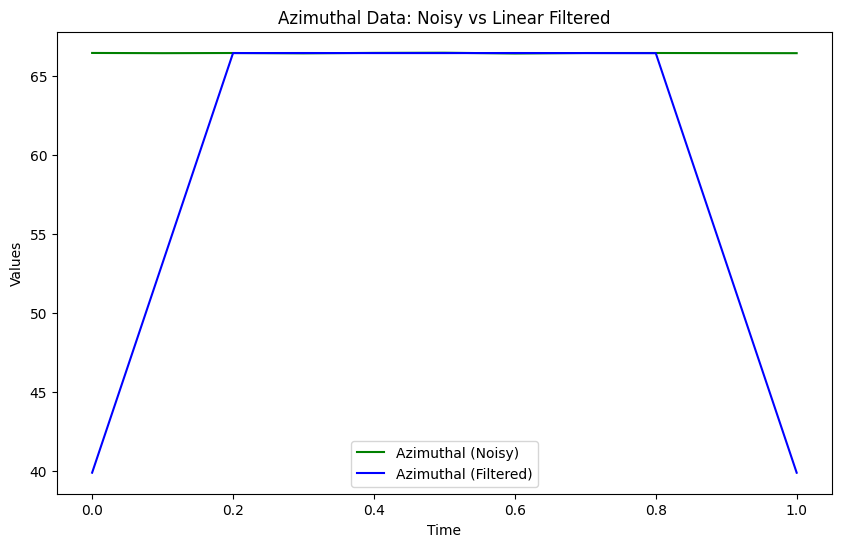

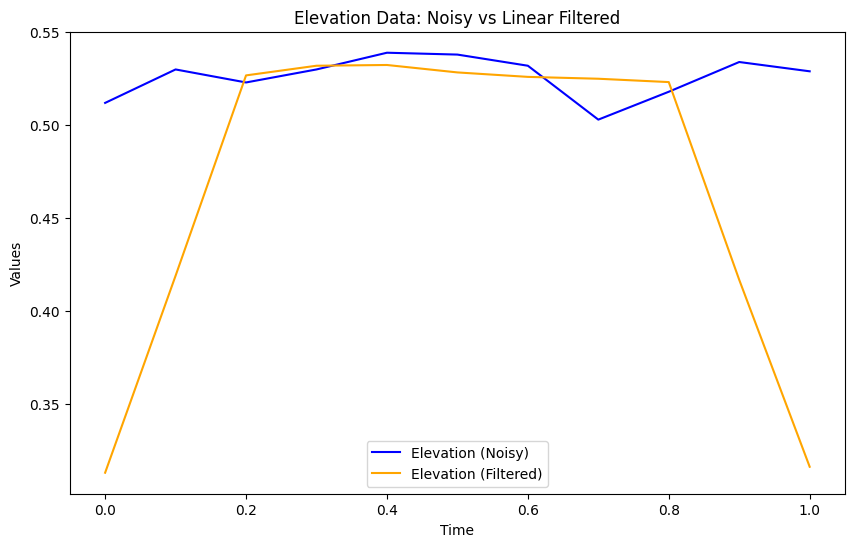

Filtered data saved to filtered_linear_data.xlsx


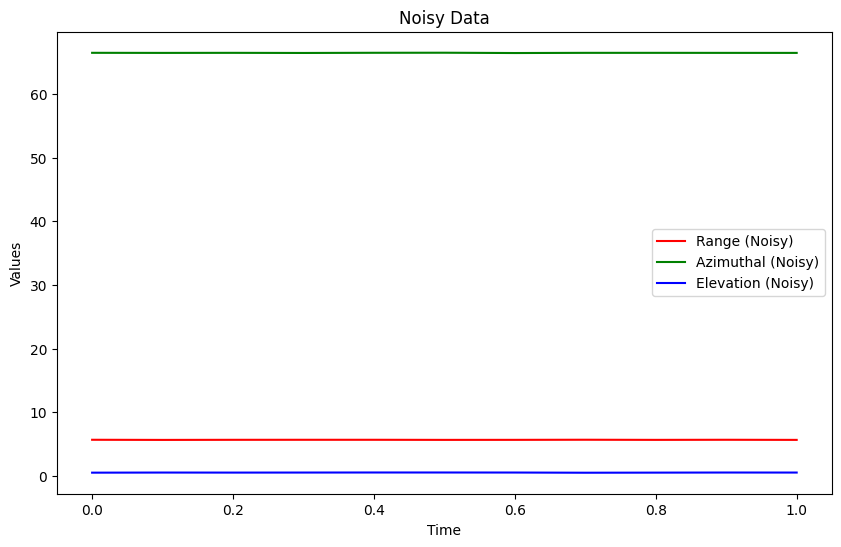

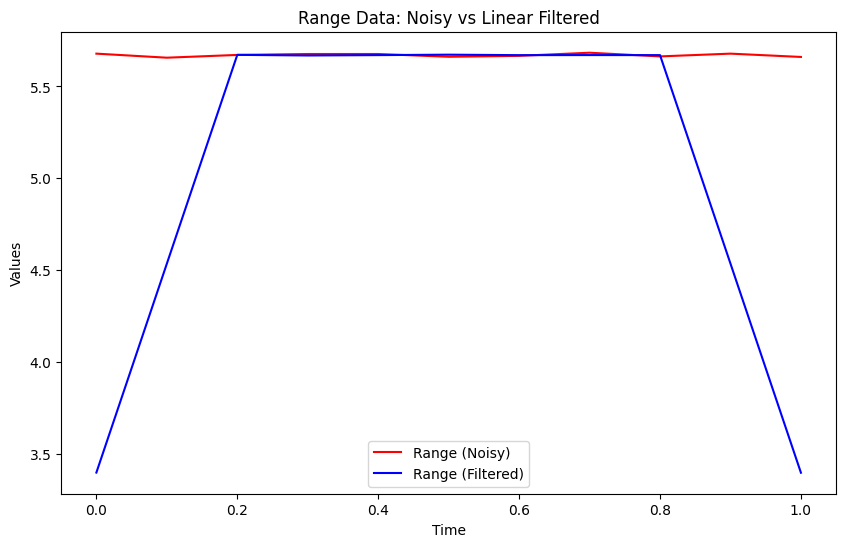

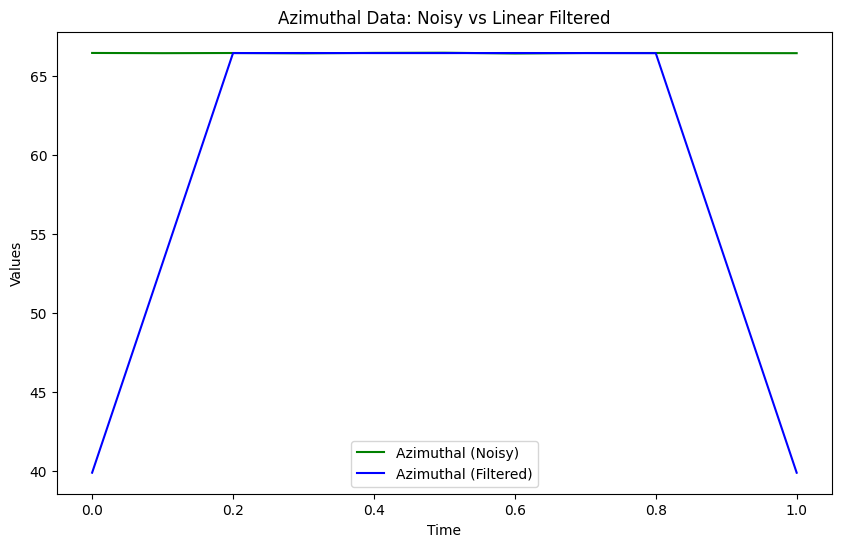

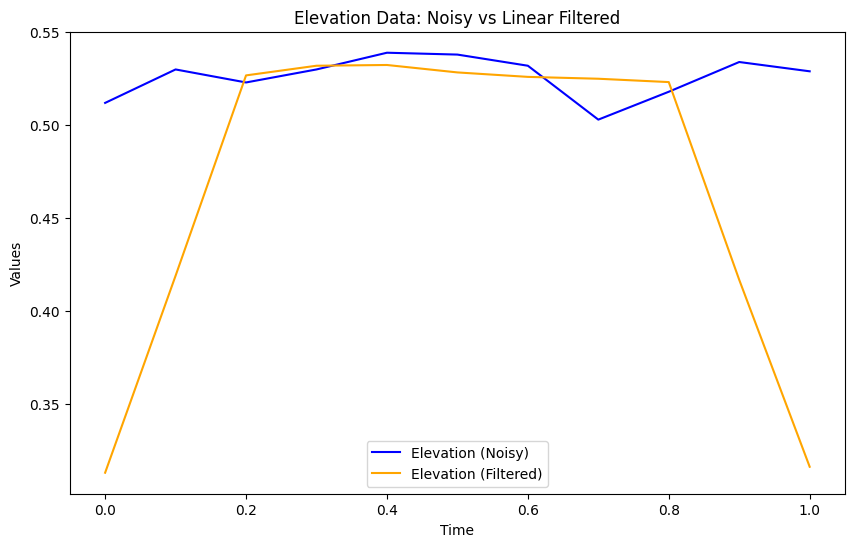

Filtered data saved to filtered_linear_data.xlsx


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel data (ensure the file path is correct)
file_path = '/content/Isro_work1.xlsx'  # Update with your actual file path
df = pd.read_excel(file_path)

# Check the column names to ensure correct access
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

# Plot the noisy data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='green')
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='blue')
plt.title('Noisy Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Apply a Linear Filter (Moving Average Filter)
def moving_average_filter(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Parameters for the filter
window_size = 5  # Window size for the moving average

# Apply the moving average filter to the data
filtered_range = moving_average_filter(df['Range'], window_size)
filtered_azimuthal = moving_average_filter(df['Azimuthal'], window_size)
filtered_elevation = moving_average_filter(df['Elevation'], window_size)

# Plot filtered data vs noisy data for comparison
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Range'], label='Range (Noisy)', color='red')
plt.plot(df['Time'], filtered_range, label='Range (Filtered)', color='blue')
plt.title('Range Data: Noisy vs Linear Filtered')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Similarly for Azimuthal and Elevation
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Azimuthal'], label='Azimuthal (Noisy)', color='green')
plt.plot(df['Time'], filtered_azimuthal, label='Azimuthal (Filtered)', color='blue')
plt.title('Azimuthal Data: Noisy vs Linear Filtered')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Elevation'], label='Elevation (Noisy)', color='blue')
plt.plot(df['Time'], filtered_elevation, label='Elevation (Filtered)', color='orange')
plt.title('Elevation Data: Noisy vs Linear Filtered')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Prepare the filtered data for saving to an Excel file
filtered_df = pd.DataFrame({
    'Time': df['Time'],
    'Range (Filtered)': filtered_range,
    'Azimuthal (Filtered)': filtered_azimuthal,
    'Elevation (Filtered)': filtered_elevation
})

# Save the filtered data to an Excel file
file_output_path = 'filtered_linear_data.xlsx'
filtered_df.to_excel(file_output_path, index=False)

print(f'Filtered data saved to {file_output_path}')


ACCURACY

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_squared_error

# Assuming df is already loaded with noisy data
# Check the column names to ensure correct access
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

# Ground truth data (if available, else compare against the noisy data itself)
# Here we assume the noisy data itself is the reference for comparison
reference_range = df['Range']
reference_azimuthal = df['Azimuthal']
reference_elevation = df['Elevation']

# Linear Filter (Moving Average Filter)
def moving_average_filter(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Apply the Savitzky-Golay Filter
window_size = 5  # Window size (must be odd for SavGol filter)
poly_order = 2   # Polynomial order for Savitzky-Golay

filtered_range_savgol = savgol_filter(df['Range'], window_size, poly_order)
filtered_azimuthal_savgol = savgol_filter(df['Azimuthal'], window_size, poly_order)
filtered_elevation_savgol = savgol_filter(df['Elevation'], window_size, poly_order)

# Apply the Gaussian Filter
sigma = 2  # Standard deviation for Gaussian filter
filtered_range_gaussian = gaussian_filter1d(df['Range'], sigma)
filtered_azimuthal_gaussian = gaussian_filter1d(df['Azimuthal'], sigma)
filtered_elevation_gaussian = gaussian_filter1d(df['Elevation'], sigma)

# Apply the Linear Filter (Moving Average)
filtered_range_linear = moving_average_filter(df['Range'], window_size)
filtered_azimuthal_linear = moving_average_filter(df['Azimuthal'], window_size)
filtered_elevation_linear = moving_average_filter(df['Elevation'], window_size)

# Define a function to compute RMSE
def compute_rmse(filtered_data, reference_data):
    return np.sqrt(mean_squared_error(reference_data, filtered_data))

# Calculate RMSE for each filter and data type
rmse_range_savgol = compute_rmse(filtered_range_savgol, reference_range)
rmse_range_gaussian = compute_rmse(filtered_range_gaussian, reference_range)
rmse_range_linear = compute_rmse(filtered_range_linear, reference_range)

rmse_azimuthal_savgol = compute_rmse(filtered_azimuthal_savgol, reference_azimuthal)
rmse_azimuthal_gaussian = compute_rmse(filtered_azimuthal_gaussian, reference_azimuthal)
rmse_azimuthal_linear = compute_rmse(filtered_azimuthal_linear, reference_azimuthal)

rmse_elevation_savgol = compute_rmse(filtered_elevation_savgol, reference_elevation)
rmse_elevation_gaussian = compute_rmse(filtered_elevation_gaussian, reference_elevation)
rmse_elevation_linear = compute_rmse(filtered_elevation_linear, reference_elevation)

# Print RMSE results
print("RMSE for Range Data:")
print(f"Savitzky-Golay Filter: {rmse_range_savgol}")
print(f"Gaussian Filter: {rmse_range_gaussian}")
print(f"Linear Filter: {rmse_range_linear}")

print("\nRMSE for Azimuthal Data:")
print(f"Savitzky-Golay Filter: {rmse_azimuthal_savgol}")
print(f"Gaussian Filter: {rmse_azimuthal_gaussian}")
print(f"Linear Filter: {rmse_azimuthal_linear}")

print("\nRMSE for Elevation Data:")
print(f"Savitzky-Golay Filter: {rmse_elevation_savgol}")
print(f"Gaussian Filter: {rmse_elevation_gaussian}")
print(f"Linear Filter: {rmse_elevation_linear}")

# Based on the RMSE values, you can determine which filter is more accurate for each data type


RMSE for Range Data:
Savitzky-Golay Filter: 0.006888984512007165
Gaussian Filter: 0.0084691593721781
Linear Filter: 1.0807477175969002

RMSE for Azimuthal Data:
Savitzky-Golay Filter: 0.009963987101610597
Gaussian Filter: 0.012345414446446018
Linear Filter: 12.670190469401359

RMSE for Elevation Data:
Savitzky-Golay Filter: 0.0062442790142788656
Gaussian Filter: 0.009271248766890158
Linear Filter: 0.10074399598622602
RMSE for Range Data:
Savitzky-Golay Filter: 0.006888984512007165
Gaussian Filter: 0.0084691593721781
Linear Filter: 1.0807477175969002

RMSE for Azimuthal Data:
Savitzky-Golay Filter: 0.009963987101610597
Gaussian Filter: 0.012345414446446018
Linear Filter: 12.670190469401359

RMSE for Elevation Data:
Savitzky-Golay Filter: 0.0062442790142788656
Gaussian Filter: 0.009271248766890158
Linear Filter: 0.10074399598622602
